In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/Aarti Thakur/Downloads/Contact Center Data.csv')

In [3]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86410 entries, 0 to 86409
Data columns (total 9 columns):
Customer_Id         86410 non-null int64
Source              86410 non-null object
Customer_Profile    86410 non-null object
Age_Group           86410 non-null object
Gender              86410 non-null object
Purpose             86410 non-null object
Product_Type        86410 non-null object
Comments            86410 non-null object
Outcome             86410 non-null object
dtypes: int64(1), object(8)
memory usage: 5.9+ MB


,Customer_Id,Source,Customer_Profile,Age_Group,Gender,Purpose,Product_Type,Comments,Outcome
0,1,SMS,Salaried,22 - 25,Male,Movies,Tablet,Call drop.,Call Disconnected
1,2,Websites,Salaried,22 - 25,Male,Speed Response,Notebook,Call drop,Call Disconnected
2,3,Websites,Salaried,26 - 30,Male,Speed Response,Notebook,"While assisting with the info, Customer discon...",Call Disconnected
3,4,Websites,Salaried,26 - 30,Male,Speed Response,Notebook,Customer had already ordered for G500 and enqu...,Product Specs Enquiry
4,5,Websites,Salaried,22 - 25,Male,Stylish,Tablet,Call disconnected,Call Disconnected
...,...,...,...,...,...,...,...,...,...
86405,49845,Websites,Salaried,26 - 30,Male,Net Surfing,Tablet,Customer is looking to buy A3000 tablet in a s...,Hot
86406,49526,Websites,--Select--,18 - 21,Male,Official,Notebook,Customer wanted to extend the warranty assiste...,BP Enquiry
86407,52600,Print Ads,Self Employed,26 - 30,Male,Net Surfing,Tablet,Customer is willing to buy A3000 tablet in a s...,Super Hot
86408,52601,Websites,Salaried,22 - 25,Male,Net Surfing,Notebook,Customer enquired about Y510p and info was given.,Product Specs Enquiry


In [4]:
df["Outcome"]= df["Outcome"].str.lower()
df.head()

,Customer_Id,Source,Customer_Profile,Age_Group,Gender,Purpose,Product_Type,Comments,Outcome
0,1,SMS,Salaried,22 - 25,Male,Movies,Tablet,Call drop.,call disconnected
1,2,Websites,Salaried,22 - 25,Male,Speed Response,Notebook,Call drop,call disconnected
2,3,Websites,Salaried,26 - 30,Male,Speed Response,Notebook,"While assisting with the info, Customer discon...",call disconnected
3,4,Websites,Salaried,26 - 30,Male,Speed Response,Notebook,Customer had already ordered for G500 and enqu...,product specs enquiry
4,5,Websites,Salaried,22 - 25,Male,Stylish,Tablet,Call disconnected,call disconnected


In [5]:
outcome = list(df['Outcome'])
print(outcome[0])

call disconnected


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

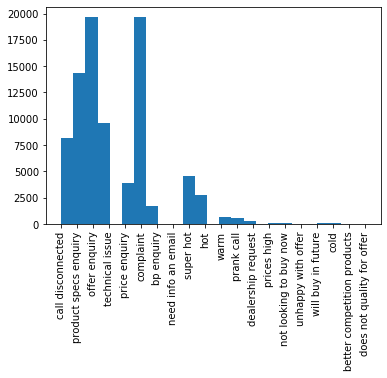

In [7]:
plt.hist(outcome, bins = 25)
plt.xticks(rotation='vertical')
plt.show() #number of calls as per different outcomes

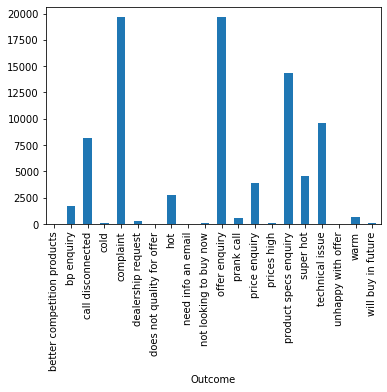

In [8]:
df.groupby('Outcome')['Product_Type'].count().plot(kind = 'bar') #number of calls as per different outcomes
plt.savefig("C:/Users/Aarti Thakur/Documents/plots/graph1.png")

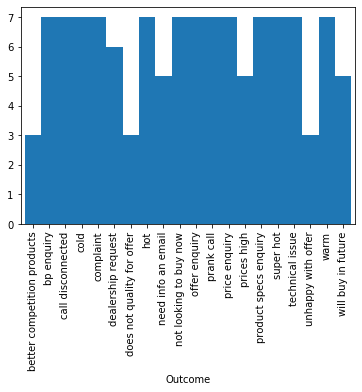

In [9]:
df.groupby('Outcome')['Product_Type'].nunique().plot(kind = 'bar', width = 1) #number of unique product type per outcome
plt.savefig("C:/Users/Aarti Thakur/Documents/plots/graph2.png")

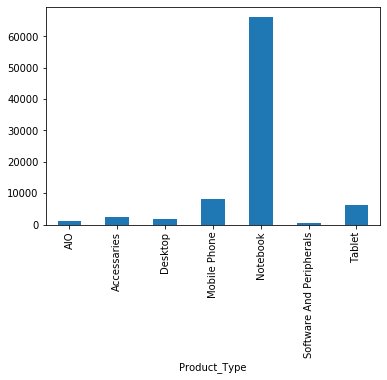

In [10]:
df.groupby('Product_Type')['Outcome'].count().plot(kind = 'bar')#To check which product has more number of call
plt.savefig("C:/Users/Aarti Thakur/Documents/plots/graph3.png")

In [11]:
new_data = df.groupby('Product_Type')['Outcome'].value_counts()

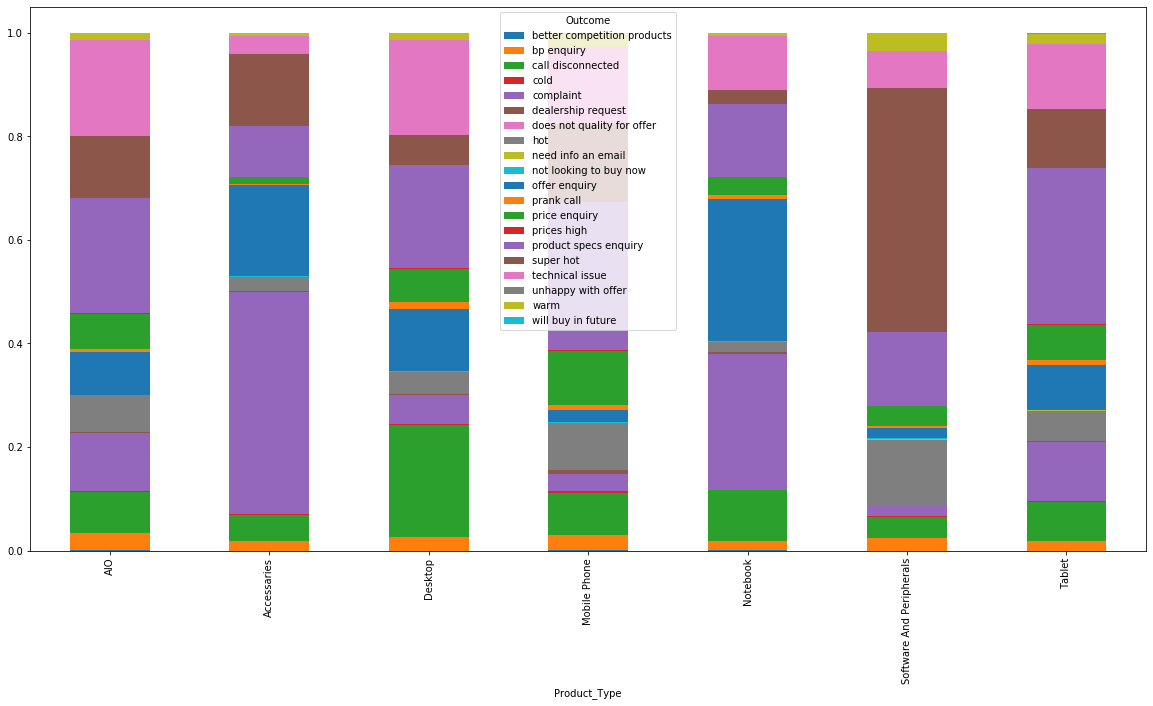

In [23]:
Product_Type = pd.crosstab(df['Product_Type'], df['Outcome'])
#Property_Area = pd.crosstab(train['Property_Area'], train['Outcome'])
Product_Type.div(Product_Type.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (20,10))
#Property_Area.div(Property_Area.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))

In [12]:
new_data1 = pd.DataFrame(new_data)

In [13]:
new_data2= new_data1.rename(columns={'Outcome': 'Outcome_Counts'}) #Creation of new dataset as the Outcome counts
new_data3 = new_data2.reset_index()
new_data3.info()
new_data3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 3 columns):
Product_Type      121 non-null object
Outcome           121 non-null object
Outcome_Counts    121 non-null int64
dtypes: int64(1), object(2)
memory usage: 3.0+ KB


,Product_Type,Outcome,Outcome_Counts
0,AIO,product specs enquiry,278
1,AIO,technical issue,230
2,AIO,super hot,151
3,AIO,complaint,140
4,AIO,offer enquiry,105
...,...,...,...
116,Tablet,prices high,8
117,Tablet,dealership request,5
118,Tablet,unhappy with offer,2
119,Tablet,does not quality for offer,1


In [14]:
new_data3.groupby(['Product_Type'])['Outcome_Counts','Outcome'].agg(['max']) #To identify the maximum outcome againts each product

,Outcome_Counts,Outcome
,max,max
Product_Type,,
AIO,278,will buy in future
Accessaries,1070,warm
Desktop,410,will buy in future
Mobile Phone,2312,will buy in future
Notebook,18174,will buy in future
Software And Peripherals,246,warm
Tablet,1842,will buy in future


In [15]:
new_data3['Outcome'].value_counts()

call disconnected              7
super hot                      7
technical issue                7
price enquiry                  7
prank call                     7
hot                            7
product specs enquiry          7
not looking to buy now         7
bp enquiry                     7
warm                           7
complaint                      7
offer enquiry                  7
cold                           7
dealership request             6
need info an email             5
prices high                    5
will buy in future             5
unhappy with offer             3
better competition products    3
does not quality for offer     3
Name: Outcome, dtype: int64